# Aviation Risk Analysis

The objective of this project is to analyse aviation accident data from 1962 to 2023 to identify the safest aircraft model.
As the company wants to venture in purchasing and operating airplanes for commercial and private enterprises, this will help to decide which aircraft to purchase.

This analysis leverages data from National Transportation and Safety Board to;

1. Help decide which aircraft to purchase.


**Key Questions**
1. Which aircraft models have the lowest accidents and injuries?
3. How can this analysis help strategic business desicions?

**Libraries used for data analysis and visualization**
1. Numpy
2. Pandas
3. Matplotlib
4. Seaborn.

In [70]:
#import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [71]:
#loding the dataset
data = pd.read_csv('AviationData.csv',encoding='latin1',low_memory=False)

#to display all columns in the dataset
pd.set_option('display.max_columns',40)

#show first 5 rows to understand the dataset
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Initial Data Understanding and Exploration

In [72]:
#checking the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [73]:
#checking the concise info 2
data.info(verbose= False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Columns: 31 entries, Event.Id to Publication.Date
dtypes: float64(5), object(26)
memory usage: 21.0+ MB


In [74]:
#cheking data shape
data.shape

(88889, 31)

In [75]:
#cheking data types
data.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [76]:
#checking columns
data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## Descriptive Statistics

In [77]:
#checking summary statistics
data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [78]:
#Cheking categorical columns
data.describe(include='object')

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,87889,85695,32287,87507,88826,88797,88787,81793,32023,12582,82697,16648,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25589,27154,10374,24870,109,4,15,79104,8237,12318,2,12,31,3,26,13590,4,12,17074,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,NONE,Cessna,152,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,67357,64148,27617,344,22227,2367,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


## Data Preparation

In [79]:
#Subsetting columns to only use whats necessary
data = data[['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 
#              'Latitude', 'Longitude', 'Airport.Code',
#        'Airport.Name', 
             'Injury.Severity', 'Aircraft.damage','Aircraft.Category'
#              , 'Registration.Number', 
             ,'Make', 'Model',
#        'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
#        'Schedule', 'Purpose.of.flight', 'Air.carrier', 
             'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
#        'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
#        'Publication.Date'
            ]]

In [80]:
#checking shape again
data.shape

(88889, 15)

Observe we have dropped the columns I do not need

## Data Cleaning

In [81]:
#create a dataframe copy for data cleaning
data1 = data.copy(deep=True)

### Changing Data types

While checking on the data types above, I noticed the Event.Date column object is an object. 
It supposed to be a date time column

In [82]:
#using date time format
data1['Event.Date'] = pd.to_datetime(data1['Event.Date'], errors='coerce')                             

In [83]:
#confirm
data1.dtypes

Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Make                              object
Model                             object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Total.Uninjured                  float64
dtype: object

### Checking for duplicates

In [84]:
data1.duplicated(keep=False).sum()

6

In [85]:
#inspecting the duplicates
duplicates = data1[data1.duplicated(keep=False)]
print(duplicates)

             Event.Id Investigation.Type Accident.Number Event.Date  \
87548  20220323104818           Accident      CEN22LA149 2022-03-18   
87549  20220323104818           Accident      CEN22LA149 2022-03-18   
88386  20220822105776           Accident      ERA22LA379 2022-08-20   
88387  20220822105776           Accident      ERA22LA379 2022-08-20   
88527  20220921105978           Incident      DCA22WA204 2022-09-14   
88528  20220921105978           Incident      DCA22WA204 2022-09-14   

            Location        Country Injury.Severity Aircraft.damage  \
87548  Grapevine, TX  United States       Non-Fatal     Substantial   
87549  Grapevine, TX  United States       Non-Fatal     Substantial   
88386   Bealeton, VA  United States           Minor     Substantial   
88387   Bealeton, VA  United States           Minor     Substantial   
88527       Mumbai,           India             NaN             NaN   
88528       Mumbai,           India             NaN             NaN   

    

In [86]:
#dropping duplicates
data1 = data1.drop_duplicates()

In [87]:
#veryfing
data1.duplicated(keep=False).sum()

0

### Standardizing Columns

In [88]:
data1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured'],
      dtype='object')

In [89]:
#Standardize columns
data1.columns = data1.columns.str.strip().str.title().str.replace('.','_')
data1.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Make', 'Model', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured'],
      dtype='object')

### Checking for missing values

In [90]:
data1.isna().sum() 

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Injury_Severity             999
Aircraft_Damage            3193
Aircraft_Category         56602
Make                         63
Model                        92
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
dtype: int64

In [91]:
# adds the number of missing values in each column
missing_values = data1.isnull().sum() 

# Getting percantage of missing values
total_rows = len(data1)
percent_missing_values = (missing_values/total_rows)*100

#using a dataframe
missing_values_df = pd.DataFrame({"missing_values": missing_values, "Percentage": percent_missing_values})

# arranges from highest percantage of missing values to lowest
missing_values_df = missing_values_df.sort_values(by='Percentage',ascending=False)
missing_values_df

,missing_values,Percentage
Aircraft_Category,56602,63.679320
Total_Serious_Injuries,12510,14.074207
Total_Minor_Injuries,11933,13.425061
Total_Fatal_Injuries,11401,12.826542
Total_Uninjured,5912,6.651216
Aircraft_Damage,3193,3.592242
Injury_Severity,999,1.123912
Country,226,0.254258
Model,92,0.103503
Make,63,0.070877


### Dropping colums with more than 50% missing values

 1. This improves the quality and usability of the dataset for analysis
 2. This also helps us focus on columns directly related to the key questions

In [92]:
#dropping Aircraft_Category column because it has over 50% missing values
data1 = data1.drop(columns=['Aircraft_Category'])

In [93]:
data1.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Injury_Severity', 'Aircraft_Damage', 'Make',
       'Model', 'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured'],
      dtype='object')

### Input missing values

In [94]:
# Inputing missing categorical columns with unknown
categorical_columns= ['Injury_Severity', 'Aircraft_Damage', 'Make','Model'] 
for column in categorical_columns:
    data1[column] = data1[column].fillna('unknown')

# Inputing missing values with the median for each column
numeric_columns = ['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']
for column in numeric_columns:
    data1[column] = data1[column].fillna(data1[column].median())

### Check for missing vaues

In [95]:
#pass in a list of columns we want to check
check_columns = ['Injury_Severity', 'Aircraft_Damage', 'Make','Model','Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']
#Check the sum missing values
data1[check_columns].isna().sum() 

Injury_Severity           0
Aircraft_Damage           0
Make                      0
Model                     0
Total_Fatal_Injuries      0
Total_Serious_Injuries    0
Total_Minor_Injuries      0
Total_Uninjured           0
dtype: int64

### Checking for outliers

<Axes: >

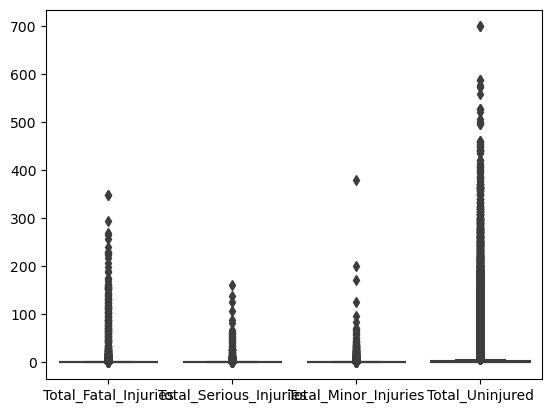

In [96]:
sns.boxplot(data1[['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']])

Outliers are not that bad

### Convert Data types

This is to ensure all the numerical columns defined are of numeric types

In [97]:
numerical_columns = ['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']
data1[numerical_columns] = data1[numerical_columns].apply(pd.to_numeric)

In [98]:
# Convert make and model column to categorical type
categorical_columns2 = ['Make', 'Model']
for column in categorical_columns2:
    data1[column] = data1[column].astype('category')

### Checking unique values

In [99]:
print(data1['Model'].unique())

['108-3', 'PA24-180', '172M', '112', '501', ..., 'XLT-RG', 'MH-60R', 'ROTORWAY EXEC 162-F', 'KITFOX S5', 'M-8 EAGLE']
Length: 12318
Categories (12318, object): ['&GCBC', '(EX) RV-6', '(MODIFIED)', '(SOLOY CONVERSION)', ..., 'none', 'sportstar', 'unk', 'unknown']


In [100]:
print(data1['Make'].unique())

['Stinson', 'Piper', 'Cessna', 'Rockwell', 'Mcdonnell Douglas', ..., 'PHANTOM', 'GREG HOBBS', 'JAMES R DERNOVSEK', 'ORLICAN S R O', 'ROYSE RALPH L']
Length: 8237
Categories (8237, object): ['107.5 Flying Corporation', '1200', '177MF LLC', '1977 Colfer-chan', ..., 'Zwart', 'de Havilland', 'drone', 'unknown']


In [101]:
data1['Make'] = data1['Make'].str.lower().str.title()

In [102]:
print(data1['Aircraft_Damage'].unique())

['Destroyed' 'Substantial' 'Minor' 'unknown' 'Unknown']


In [103]:
# Standardize Text Values- Convert all values to lowercase to ensure consistent capitalization.
data1['Aircraft_Damage'] = data1['Aircraft_Damage'].str.lower()

In [104]:
data1['Aircraft_Damage']

0          destroyed
1          destroyed
2          destroyed
3          destroyed
4          destroyed
            ...     
88884        unknown
88885        unknown
88886    substantial
88887        unknown
88888        unknown
Name: Aircraft_Damage, Length: 88886, dtype: object

In [105]:
data1['Injury_Severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal

### Filtering Relevant Data

Fltering for 'Accident' to ensure the analysis aligns with the objective of focusing on high-risk events.

In [106]:
data1['Investigation_Type'].unique()

array(['Accident', 'Incident'], dtype=object)

In [107]:
# Focus only on accidents
data1 = data1[data1['Investigation_Type'] == 'Accident']

### Feature engineering

#### Creating a column of Fatalities

1. The categories has value counts indicating a fatal incident with the number of fatalities in parentheses.
2. I will split and strip to separate them 
3. Also create a new column

In [108]:
# Define a function to clean the data
def clean_injury_severity(value):
    if 'Fatal' in value:
        # Extract the number in parentheses if it exists
        if '(' in value:
            return int(value.split('(')[1].strip(')'))
        else:
            return 1  # Default for 'Fatal' without a number
    elif value in ['Non-Fatal', 'Minor', 'Serious']:
        return 0  # Non-fatal categories treated as 0 fatalities
    else:
        return np.nan  # Handle 'unknown' and 'Unavailable' as missing values

# Apply the cleaning function
data1['Fatalities'] = data1['Injury_Severity'].apply(clean_injury_severity)

# View the cleaned data
print(data1[['Injury_Severity', 'Fatalities']].head())

  Injury_Severity  Fatalities
0        Fatal(2)         2.0
1        Fatal(4)         4.0
2        Fatal(3)         3.0
3        Fatal(2)         2.0
4        Fatal(1)         1.0


#### Creating a column of total injuries

In [109]:
 # Create a total injuries column
data1['Total_Injuries'] = (data1['Total_Fatal_Injuries'] + data1['Total_Serious_Injuries'] + data1['Total_Minor_Injuries'])
data1[['Total_Injuries']]

,Total_Injuries
0,2.0
1,4.0
2,3.0
3,2.0
4,3.0
...,...
88884,1.0
88885,0.0
88886,0.0
88887,0.0


#### Creating a column of damage level

To transform categorical data ('Aircraft_Damage') into numerical values ('Damage_Level')

In [110]:
# To get the level of damage represented by a number
damage_mapping = {'destroyed': 3, 'substantial': 2, 'minor': 1,'unknown': 0}
data1['Damage_Level'] = data1['Aircraft_Damage'].map(damage_mapping)
data1.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_Damage,Make,Model,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Fatalities,Total_Injuries,Damage_Level
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,2.0,2.0,3
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,4.0,4.0,3
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),destroyed,Cessna,172M,3.0,0.0,0.0,1.0,3.0,3.0,3
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),destroyed,Rockwell,112,2.0,0.0,0.0,0.0,2.0,2.0,3
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),destroyed,Cessna,501,1.0,2.0,0.0,0.0,1.0,3.0,3


In [111]:
data1

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_Damage,Make,Model,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Fatalities,Total_Injuries,Damage_Level
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,2.0,2.0,3
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,4.0,4.0,3
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),destroyed,Cessna,172M,3.0,0.0,0.0,1.0,3.0,3.0,3
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),destroyed,Rockwell,112,2.0,0.0,0.0,0.0,2.0,2.0,3
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),destroyed,Cessna,501,1.0,2.0,0.0,0.0,1.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,unknown,Piper,PA-28-151,0.0,1.0,0.0,0.0,0.0,1.0,0
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,unknown,unknown,Bellanca,7ECA,0.0,0.0,0.0,0.0,NaN,0.0,0
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,substantial,American Champion Aircraft,8GCBC,0.0,0.0,0.0,1.0,1.0,0.0,2
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,unknown,unknown,Cessna,210N,0.0,0.0,0.0,0.0,NaN,0.0,0


#### Creating a column of Make and Model

In [112]:
# Combining Make and Model columns to get full name of aircraft
data1['Aircraft'] = data1['Make'].astype(str) + ' ' + data1['Model'].astype(str)

In [113]:
data1.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Injury_Severity', 'Aircraft_Damage', 'Make',
       'Model', 'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Fatalities',
       'Total_Injuries', 'Damage_Level', 'Aircraft'],
      dtype='object')

In [114]:
data1[['Aircraft']]

,Aircraft
0,Stinson 108-3
1,Piper PA24-180
2,Cessna 172M
3,Rockwell 112
4,Cessna 501
...,...
88884,Piper PA-28-151
88885,Bellanca 7ECA
88886,American Champion Aircraft 8GCBC
88887,Cessna 210N


#### Creating a column of total metrics of Damages, Fatalties and Injuries

In [115]:
# This adds all to get the objective
data1['Total_Metric'] = data1['Fatalities'] + data1['Damage_Level'] + data1['Total_Injuries']

In [116]:
data1.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_Damage,Make,Model,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Fatalities,Total_Injuries,Damage_Level,Aircraft,Total_Metric
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,2.0,2.0,3,Stinson 108-3,7.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,4.0,4.0,3,Piper PA24-180,11.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),destroyed,Cessna,172M,3.0,0.0,0.0,1.0,3.0,3.0,3,Cessna 172M,9.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),destroyed,Rockwell,112,2.0,0.0,0.0,0.0,2.0,2.0,3,Rockwell 112,7.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),destroyed,Cessna,501,1.0,2.0,0.0,0.0,1.0,3.0,3,Cessna 501,7.0


### Validate before saving the clean copy

In [117]:
# Inspect the cleaned dataset
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 85013 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event_Id                85013 non-null  object        
 1   Investigation_Type      85013 non-null  object        
 2   Accident_Number         85013 non-null  object        
 3   Event_Date              85013 non-null  datetime64[ns]
 4   Location                84973 non-null  object        
 5   Country                 84807 non-null  object        
 6   Injury_Severity         85013 non-null  object        
 7   Aircraft_Damage         85013 non-null  object        
 8   Make                    85013 non-null  object        
 9   Model                   85013 non-null  category      
 10  Total_Fatal_Injuries    85013 non-null  float64       
 11  Total_Serious_Injuries  85013 non-null  float64       
 12  Total_Minor_Injuries    85013 non-null  float64    

In [118]:
data1.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_Damage,Make,Model,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Fatalities,Total_Injuries,Damage_Level,Aircraft,Total_Metric
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,2.0,2.0,3,Stinson 108-3,7.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,4.0,4.0,3,Piper PA24-180,11.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),destroyed,Cessna,172M,3.0,0.0,0.0,1.0,3.0,3.0,3,Cessna 172M,9.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),destroyed,Rockwell,112,2.0,0.0,0.0,0.0,2.0,2.0,3,Rockwell 112,7.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),destroyed,Cessna,501,1.0,2.0,0.0,0.0,1.0,3.0,3,Cessna 501,7.0


### Saving the clean copy

In [119]:
#save the new dataframe in csv format
data1.to_csv('CLEAN_AviationData.csv', index=False)

###  Loading the clean Dataset

In [120]:
avidata = pd.read_csv('CLEAN_AviationData.csv',low_memory=False)
print(avidata.shape)
avidata.head()

(85013, 19)


,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_Damage,Make,Model,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Fatalities,Total_Injuries,Damage_Level,Aircraft,Total_Metric
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,2.0,2.0,3,Stinson 108-3,7.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,4.0,4.0,3,Piper PA24-180,11.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),destroyed,Cessna,172M,3.0,0.0,0.0,1.0,3.0,3.0,3,Cessna 172M,9.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),destroyed,Rockwell,112,2.0,0.0,0.0,0.0,2.0,2.0,3,Rockwell 112,7.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),destroyed,Cessna,501,1.0,2.0,0.0,0.0,1.0,3.0,3,Cessna 501,7.0


## Exploratory Data Analysis

To analyze and investigate data set to summarize their main characteristics in line with our objective

In [121]:
avidata.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_Damage,Make,Model,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Fatalities,Total_Injuries,Damage_Level,Aircraft,Total_Metric
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,2.0,2.0,3,Stinson 108-3,7.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,4.0,4.0,3,Piper PA24-180,11.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),destroyed,Cessna,172M,3.0,0.0,0.0,1.0,3.0,3.0,3,Cessna 172M,9.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),destroyed,Rockwell,112,2.0,0.0,0.0,0.0,2.0,2.0,3,Rockwell 112,7.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),destroyed,Cessna,501,1.0,2.0,0.0,0.0,1.0,3.0,3,Cessna 501,7.0


In [122]:
# Group data by aircraft make and model
grouped_data = avidata.groupby(['Aircraft']).agg({ 'Damage_Level': 'sum','Fatalities': 'sum','Total_Injuries': 'sum', 'Total_Metric':'sum'}).reset_index()
grouped_data

,Aircraft,Damage_Level,Fatalities,Total_Injuries,Total_Metric
0,107.5 Flying Corporation One Design DR 107,3,1.0,1.0,5.0
1,1200 G103,2,1.0,1.0,4.0
2,177Mf Llc PITTS MODEL 12,2,1.0,2.0,5.0
3,1977 Colfer-Chan STEEN SKYBOLT,2,1.0,1.0,4.0
4,1St Ftr Gp FOCKE-WULF 190,3,1.0,1.0,5.0
...,...,...,...,...,...
17785,Zubair S Khan RAVEN,2,1.0,1.0,4.0
17786,Zuber Thomas P ZUBER SUPER DRIFTER,2,1.0,0.0,3.0
17787,Zukowski EAA BIPLANE,2,1.0,0.0,3.0
17788,Zwart KIT FOX VIXEN,2,1.0,0.0,3.0


### Checking top 10 Aircraft models with highest injuries

In [123]:
# Sort by Highest total injuries
highest_injuries_df = grouped_data.sort_values(by='Total_Injuries', ascending=False).head(10)

# Top 10 aircraft with highest injuries
highest_injuries_df 

,Aircraft,Damage_Level,Fatalities,Total_Injuries,Total_Metric
3063,Boeing 737,184,100.0,1796.0,2035.0
4301,Cessna 172,3649,1818.0,1100.0,6547.0
3080,Boeing 737-200,61,925.0,1050.0,2028.0
4277,Cessna 152,5022,2468.0,1012.0,8495.0
12967,Piper PA-28-140,2069,1052.0,996.0,4114.0
4352,Cessna 172N,2531,1342.0,975.0,4842.0
12984,Piper PA-28-181,1187,752.0,676.0,2612.0
4350,Cessna 172M,1721,876.0,662.0,3256.0
2465,Bell 206B,1157,620.0,629.0,2402.0
12977,Piper PA-28-180,1283,681.0,607.0,2571.0


Ploting for visualisation

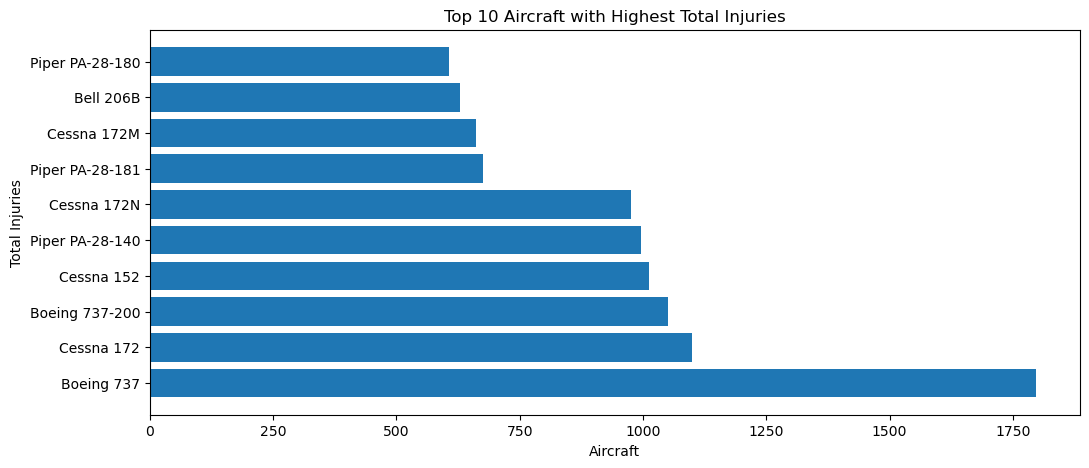

In [124]:
plt.figure(figsize=(12, 5))  # Set the figure size for better readability

# Create a horizontal bar chart
plt.barh(highest_injuries_df['Aircraft'], highest_injuries_df['Total_Injuries'])

# Add titles and labels
plt.xlabel('Aircraft')
plt.ylabel('Total Injuries')
plt.title('Top 10 Aircraft with Highest Total Injuries')

# Show the plot
plt.show()

Observation, Boeing 737 has the highest total injuries

### Checking top 10 Aircrafts with highest fatalities

In [125]:
# Sort by highest fatalities
Highest_fatalities_df = grouped_data.sort_values(by='Fatalities', ascending=False).head(10)

#  Top 10 aircraft with highest fatalities
Highest_fatalities_df  

,Aircraft,Damage_Level,Fatalities,Total_Injuries,Total_Metric
4277,Cessna 152,5022,2468.0,1012.0,8495.0
4301,Cessna 172,3649,1818.0,1100.0,6547.0
4352,Cessna 172N,2531,1342.0,975.0,4842.0
12967,Piper PA-28-140,2069,1052.0,996.0,4114.0
3080,Boeing 737-200,61,925.0,1050.0,2028.0
4350,Cessna 172M,1721,876.0,662.0,3256.0
4250,Cessna 150,1755,836.0,447.0,3035.0
4355,Cessna 172P,1502,812.0,565.0,2874.0
12984,Piper PA-28-181,1187,752.0,676.0,2612.0
4409,Cessna 182,1408,687.0,530.0,2620.0


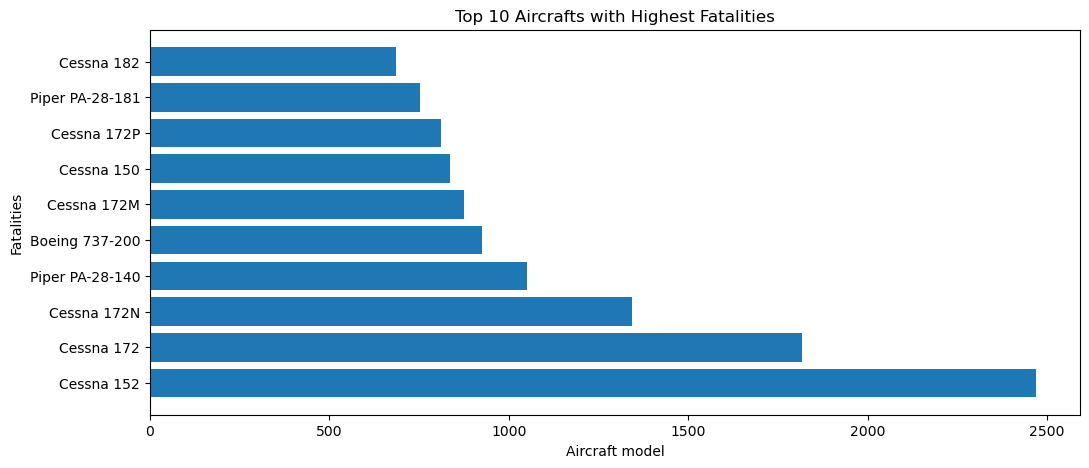

In [126]:
plt.figure(figsize=(12,5))

plt.barh(Highest_fatalities_df['Aircraft'], Highest_fatalities_df['Fatalities'])

# Add titles and labels
plt.title('Top 10 Aircrafts with Highest Fatalities')
plt.xlabel('Aircraft model')
plt.ylabel('Fatalities')
plt.show()

Observation, Cessna 152 has the highest Fatalities

### Checking top 10 Aircrafts with highest damage levels

In [127]:
# Sort by highest damage levels
Highest_damage_df = grouped_data.sort_values(by='Damage_Level', ascending=False).head(10)

#  Top 10 aircraft with highest damage levels
Highest_damage_df  

,Aircraft,Damage_Level,Fatalities,Total_Injuries,Total_Metric
4277,Cessna 152,5022,2468.0,1012.0,8495.0
4301,Cessna 172,3649,1818.0,1100.0,6547.0
4352,Cessna 172N,2531,1342.0,975.0,4842.0
12967,Piper PA-28-140,2069,1052.0,996.0,4114.0
4250,Cessna 150,1755,836.0,447.0,3035.0
4350,Cessna 172M,1721,876.0,662.0,3256.0
4355,Cessna 172P,1502,812.0,565.0,2874.0
4409,Cessna 182,1408,687.0,530.0,2620.0
4385,Cessna 180,1285,666.0,247.0,2198.0
12977,Piper PA-28-180,1283,681.0,607.0,2571.0


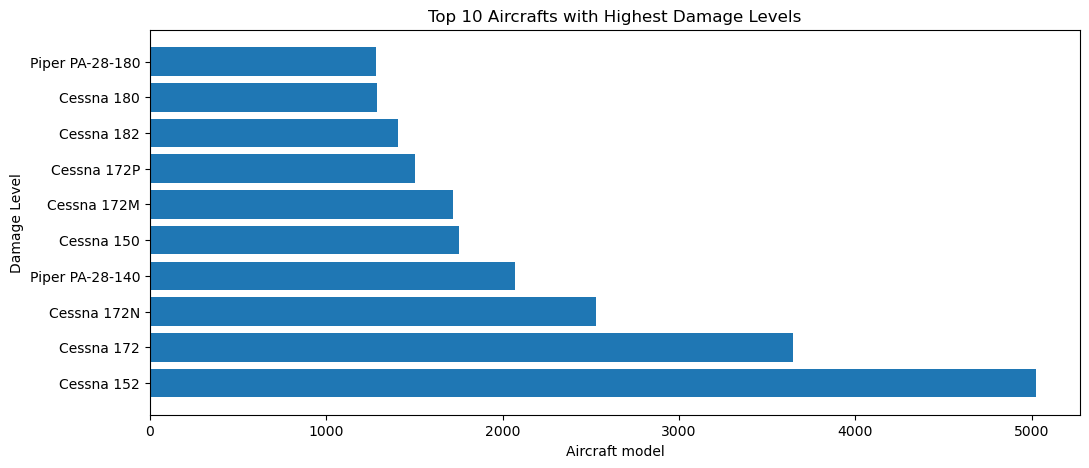

In [128]:
plt.figure(figsize=(12,5))

plt.barh(Highest_damage_df['Aircraft'], Highest_damage_df['Damage_Level'])

# Add titles and labels
plt.title('Top 10 Aircrafts with Highest Damage Levels')
plt.xlabel('Aircraft model')
plt.ylabel('Damage Level')
plt.show()

Observation, Cessna 152 has the highest damage levels

### Checking which model has the HIGHEST total metrics

#### Top 10 Aircrafts with highest metrics

In [129]:
# Sort by the Total_Metric to find the highest
grouped_data['Total_Metric'] = grouped_data['Damage_Level'] + grouped_data['Fatalities'] + grouped_data['Total_Injuries']
Hmetrics = grouped_data.sort_values(by='Total_Metric', ascending=False).head(10)
Hmetrics

,Aircraft,Damage_Level,Fatalities,Total_Injuries,Total_Metric
4277,Cessna 152,5022,2468.0,1012.0,8502.0
4301,Cessna 172,3649,1818.0,1100.0,6567.0
4352,Cessna 172N,2531,1342.0,975.0,4848.0
12967,Piper PA-28-140,2069,1052.0,996.0,4117.0
4350,Cessna 172M,1721,876.0,662.0,3259.0
4250,Cessna 150,1755,836.0,447.0,3038.0
4355,Cessna 172P,1502,812.0,565.0,2879.0
4409,Cessna 182,1408,687.0,530.0,2625.0
12984,Piper PA-28-181,1187,752.0,676.0,2615.0
12977,Piper PA-28-180,1283,681.0,607.0,2571.0


In [130]:
# Sort by highest metrics
Highest_metric_df = grouped_data.sort_values(by='Total_Metric', ascending=False).head(10)

#  Top 10 aircraft with highest metric
Highest_metric_df

,Aircraft,Damage_Level,Fatalities,Total_Injuries,Total_Metric
4277,Cessna 152,5022,2468.0,1012.0,8502.0
4301,Cessna 172,3649,1818.0,1100.0,6567.0
4352,Cessna 172N,2531,1342.0,975.0,4848.0
12967,Piper PA-28-140,2069,1052.0,996.0,4117.0
4350,Cessna 172M,1721,876.0,662.0,3259.0
4250,Cessna 150,1755,836.0,447.0,3038.0
4355,Cessna 172P,1502,812.0,565.0,2879.0
4409,Cessna 182,1408,687.0,530.0,2625.0
12984,Piper PA-28-181,1187,752.0,676.0,2615.0
12977,Piper PA-28-180,1283,681.0,607.0,2571.0


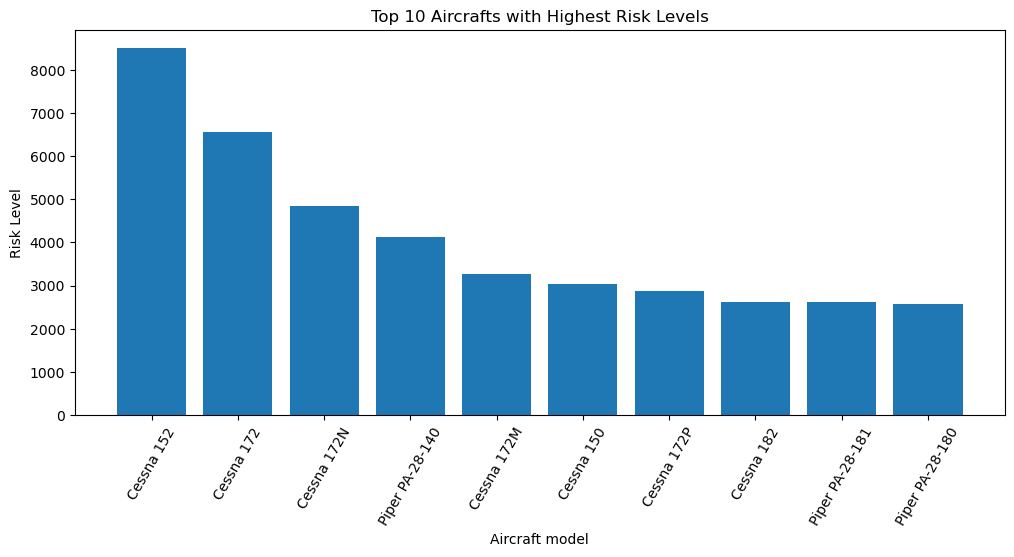

In [131]:
plt.figure(figsize=(12,5))

plt.bar(Highest_metric_df['Aircraft'], Highest_metric_df['Total_Metric'])

# Add titles and labels
plt.title('Top 10 Aircrafts with Highest Risk Levels')
plt.xlabel('Aircraft model')
plt.ylabel('Risk Level')
plt.xticks(rotation=60)# Rotate the x-axis labels to avoid overlap
plt.show()

### Checking which model has the LEAST total metrics

#### Top 10 Aircrafts with least metrics

In [132]:
# Sort by the Total_Metric to find the least
grouped_data['Total_Metric'] = grouped_data['Damage_Level'] + grouped_data['Fatalities'] + grouped_data['Total_Injuries']
Lmetrics = grouped_data.sort_values(by='Total_Metric', ascending=True).head(15)
Lmetrics

,Aircraft,Damage_Level,Fatalities,Total_Injuries,Total_Metric
4387,Cessna 180 - UNDESIGNAT,0,0.0,0.0,0.0
8408,Gulfstream Aerospace Lp Gulfstream G150,0,0.0,0.0,0.0
3416,Bombardier BD 700 1A10,0,0.0,0.0,0.0
8726,Hawker Siddeley 800XP,0,0.0,0.0,0.0
16218,Syracuse V F/Syracuse C D KITFOX,0,0.0,0.0,0.0
3241,Boeing 777 - 200,0,0.0,0.0,0.0
7581,Found Acft Canada Inc FBA-2C1,0,0.0,0.0,0.0
16851,Uvify IFO,0,0.0,0.0,0.0
1172,American Legend Aircraft Compa AL18,0,0.0,0.0,0.0
3113,Boeing 737-4B6,0,0.0,0.0,0.0


- These are the top 10 aircrafts to choose

### Total Injuries, Fatalities, and Damage Level over time

In [133]:
# convert the column Event_Date to a datetime type:
avidata['Event_Date'] = pd.to_datetime(avidata['Event_Date'], errors='coerce')

# Set the 'Event_Date' column as the index
avidata.set_index('Event_Date', inplace=True, drop=False)

# resample the data at a yearly frequency
yearly_data = avidata.resample('Y').agg({  
    'Total_Injuries': 'sum',
    'Fatalities': 'sum',
    'Damage_Level': 'sum',
    'Total_Metric': 'sum'
}).reset_index()

yearly_data.head()

,Event_Date,Total_Injuries,Fatalities,Damage_Level,Total_Metric
0,1948-12-31,2.0,2.0,3,7.0
1,1949-12-31,0.0,0.0,0,0.0
2,1950-12-31,0.0,0.0,0,0.0
3,1951-12-31,0.0,0.0,0,0.0
4,1952-12-31,0.0,0.0,0,0.0


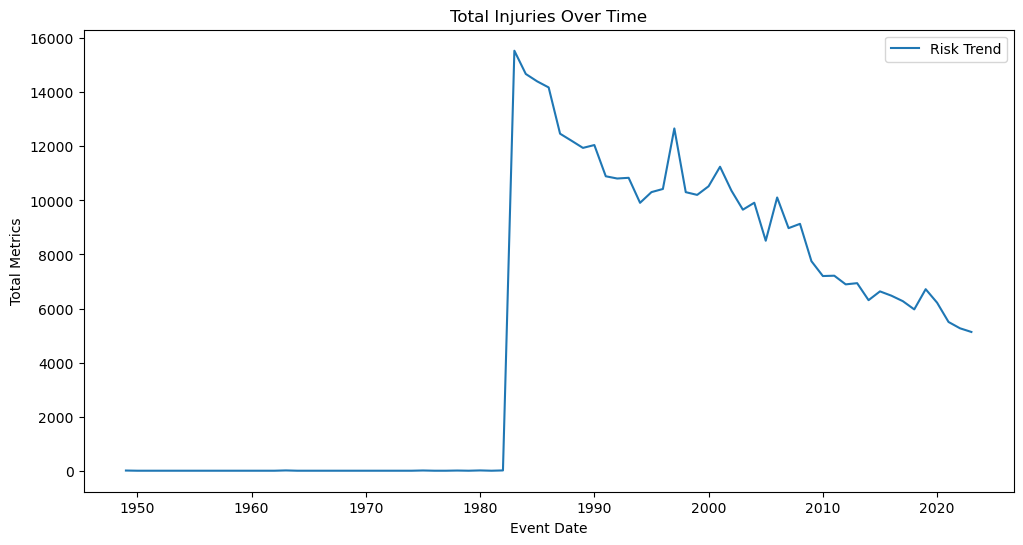

In [134]:
# Plotting Total Injuries over time
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['Event_Date'], yearly_data['Total_Metric'], label='Risk Trend')

plt.title('Total Injuries Over Time')
plt.xlabel('Event Date')
plt.ylabel('Total Metrics')
plt.legend()
plt.show()

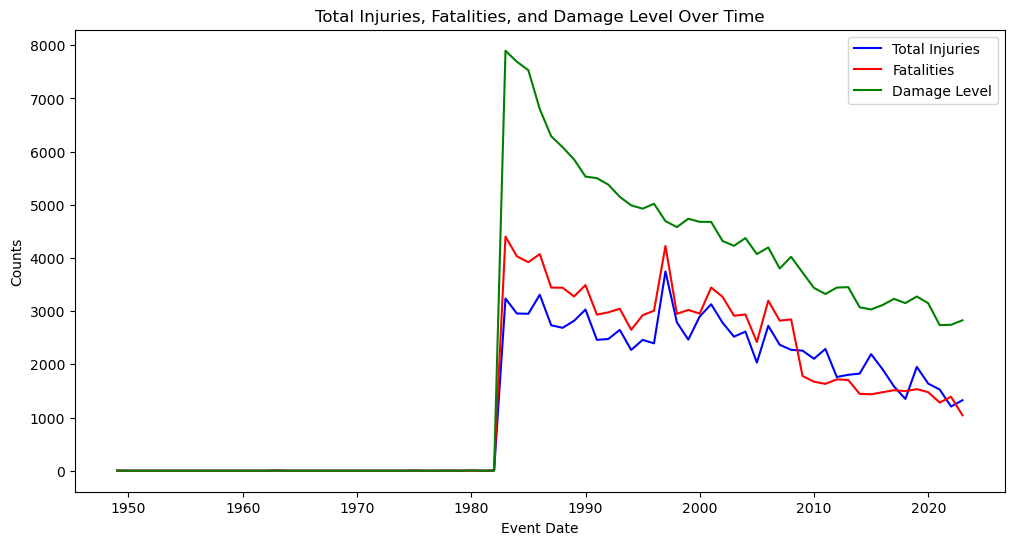

In [135]:
# Plotting Total Injuries, Fatalities, and Damage Level over time
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['Event_Date'], yearly_data['Total_Injuries'], label='Total Injuries', color='b')
plt.plot(yearly_data['Event_Date'], yearly_data['Fatalities'], label='Fatalities', color='r')
plt.plot(yearly_data['Event_Date'], yearly_data['Damage_Level'], label='Damage Level', color='g')

# Add titles and labels
plt.title('Total Injuries, Fatalities, and Damage Level Over Time')
plt.xlabel('Event Date')
plt.ylabel('Counts')
plt.legend()
plt.show()


- Buy new aircrafts since Total Injuries, Fatalities, and Damage levels have been steadily declining by each year